In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from figure_functions import process_symptom_data, prevplot
from config import (dta_dir,
                    figure_dir,
                    derived_dir)

## LCA - core symptoms 

In [3]:
def plt_prevalence(dta_dir,fname,ax,i,max_i=3, 
                   all_=False, rotate=True):
    
    symptoms = process_symptom_data(dta_dir, fname)

    prevplot(symptoms,ax,i,all_=all_, 
             max_i = max_i, rotate=rotate)

In [4]:
files = ['llc_0028_complete_c_lca_4class_all_prev_data_v2.csv',
        'llc_0028_complete_c_lca_4class_0_prev_data_v2.csv',
        'llc_0028_complete_c_lca_4class_1_prev_data_v2.csv',
        'llc_0028_complete_c_lca_4class_2_prev_data_v2.csv',
        ]

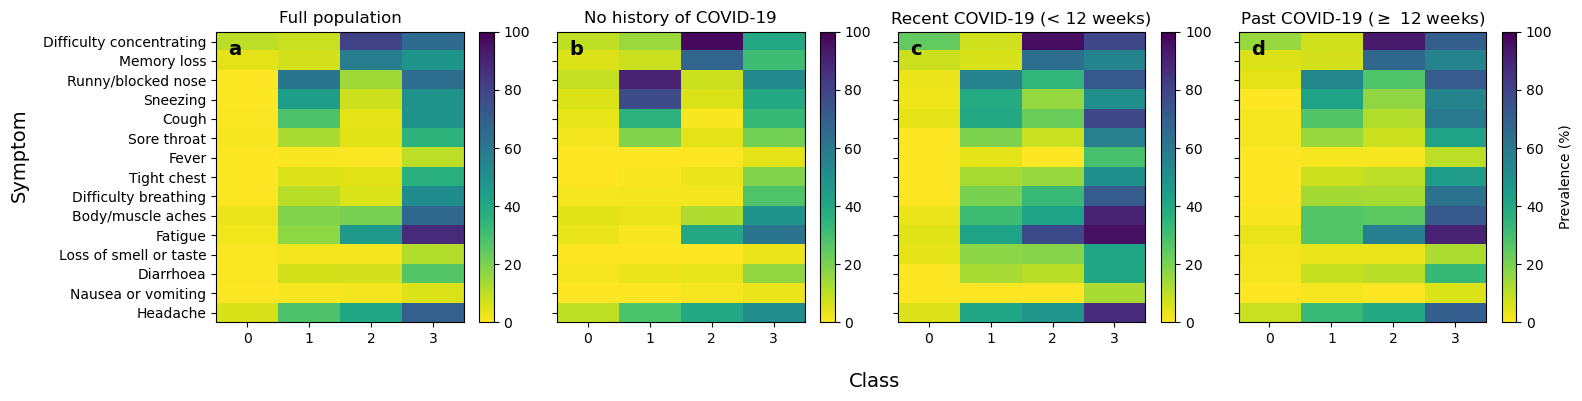

In [5]:
fig,ax_list = plt.subplots(1,4,figsize=(16,4), sharey=True)

titles = ['Full population','No history of COVID-19',
          'Recent COVID-19 (< 12 weeks)', 'Past COVID-19 ($\geq$ 12 weeks)']
letters = ['a','b','c','d']

for i,ax in enumerate(ax_list[1:]):
    
    s = plt_prevalence(dta_dir, files[i+1],ax,i+1, 
                       max_i=3, rotate=True)
    ax.set_title(titles[i+1], fontsize=12)
    
    ax.text(0.05, 0.92, letters[i+1],fontsize=14,
            fontweight='bold', transform=ax.transAxes)
i=0    
ax = ax_list[i]
plt_prevalence(dta_dir, files[i],ax,i, all_=True, rotate=True)
ax.set_title(titles[i], fontsize=12)
ax.text(0.05, 0.92, letters[i],fontsize=14,
            fontweight='bold', transform=ax.transAxes)

fig.supylabel('Symptom',fontsize=14, position=(0.01,0.6))
fig.supxlabel('Class',fontsize=14, x = 0.55)

plt.tight_layout()
plt.savefig(figure_dir + 'lca_core.pdf')
plt.savefig(figure_dir + 'lca_core.png',dpi=300)
plt.show()

## Tables 

In [6]:
for f in files:
    
    fname = f.split('.')[0]
    raw = pd.read_csv((derived_dir + f'{fname}_raw.csv'), index_col=0).T
    processed = pd.read_csv((derived_dir + f'{fname}_processed.csv'), index_col=0).T
    
    #reorder rows in raw to match class idx
    raw = raw.iloc[processed.index]
    
    table = pd.DataFrame()

    for column in raw.columns:

        N = raw[column]

        if column=='size':
            perc = processed['% size']

        else:
            perc = processed[column]

        table[column] = [f'{n} ({round(perc[i],2)})' for i,n in enumerate(N)]
        
    group = f.split('_')[-4]
    table.T.to_csv(figure_dir + f'symptom_table_{group}.csv')